# Polycrystalline Datasets -- The Microstructure class

This tutorial focus on the polycrystalline datasets that can be built and processed with Pymicro, and on the data model and content of these datasets.

The interface with these datasets is the `Microstructure` class of the `pymicro.crystal.microstructure` module. This class is a derived from the `SampleData` class, that implements a generic interface for complex multimodal HDF5 scientific datasets. As such, the `Microstructure` class and its datasets inherits all the features of the `SampleData` class. Hence, a `Microstructure` object will be automatically associated with a HDF5 file that will contain the dataset associated to this instance. 

A practical knowledge of the manipulation of `SampleData` and associated datasets is strongly recommended to go through this tutorial. For a detailed review of the features related to the `SampleData` class, please refer to the [data management tutorials](./Data_Management_tutorial.rst). 

## Microstructure datasets

*Pymicro* examples data base contains several polycrystalline samples datasets built with the `Microstructure` class. We will observe these datasets to introduce them.

This file is zipped in the package to reduce its size. If you are reading through this tutorial as a Notebook, you will first have to unzip the file: 

In [1]:
from config import PYMICRO_EXAMPLES_DATA_DIR # import file directory path
import os 
dataset_file = os.path.join(PYMICRO_EXAMPLES_DATA_DIR, 'example_microstructure') # test dataset desired file path
tar_file = os.path.join(PYMICRO_EXAMPLES_DATA_DIR, 'example_microstructure.tar.gz') # dataset zipped archive path

# Save current directory
cwd = os.getcwd()
# move to example data directory
os.chdir(PYMICRO_EXAMPLES_DATA_DIR)
# unarchive the dataset
os.system(f'tar -xvf {tar_file}')
# get back to UserGuide directory
os.chdir(cwd)

example_microstructure.h5
example_microstructure.xdmf


Let us now open the dataset, using the `Microstructure`:

In [2]:
# import SampleData class
from pymicro.crystal.microstructure import Microstructure 

In [3]:
# Open Microstructure dataset
micro = Microstructure(filename=dataset_file)

The dataset is now open, we can now look at its content:

In [4]:
micro.print_dataset_content(short=True)

Printing dataset content with max depth 3
  |--GROUP Amitex_Results: /Amitex_Results (Group) 
     --NODE mean_strain: /Amitex_Results/mean_strain (data_array) (   63.984 Kb)
     --NODE mean_stress: /Amitex_Results/mean_stress (data_array) (   63.984 Kb)
     --NODE rms_strain: /Amitex_Results/rms_strain (data_array) (   63.984 Kb)
     --NODE rms_stress: /Amitex_Results/rms_stress (data_array) (   63.984 Kb)
     --NODE simulation_iterations: /Amitex_Results/simulation_iterations (data_array) (   64.000 Kb)
     --NODE simulation_time: /Amitex_Results/simulation_time (data_array) (   64.000 Kb)

  |--GROUP CellData: /CellData (3DImage) 
    |--GROUP Amitex_output_fields: /CellData/Amitex_output_fields (Group) 
       --NODE Amitex_stress_1: /CellData/Amitex_output_fields/Amitex_stress_1 (field_array) (   49.438 Mb)

     --NODE Field_index: /CellData/Field_index (string_array) (   63.999 Kb)
     --NODE grain_map: /CellData/grain_map (field_array) (    1.945 Mb)
     --NODE grain_map

We can also print the description attribute of the dataset to read information written by its creators:

In [5]:
print(micro.get_description())

Dataset representing a subvolume of a grade 2 Titanium sample.
  * Obtained by cropping a full DCT microstructure of the sample to get a 100x100x100 voxels sub image
  * Contains a mesh of the polycrystalline microstructure, conformal with the grains geometry
  * Contains FFT simulation results
  * Contains DCT imaging outputs



This second print inform us that this dataset refer to a polycristalline microstructure of a grade 2 Titanium sample, gathering both experimental and numerical data obtained through Diffraction Contrast Tomography imaging, and FFT-based mechanical simulation. 

The first print shows that the dataset contains various groups of data:
* a group `PhaseData` that contains information on the sample phases (a single phase in this case)
* a group `CellData` that contains maps (*fields*) of the grains, *i.e.* a mapping of the microstructure, and a stress field obtained via numerical simulation. This group indicates that the mapping of the phases in the sample is not provided.
* a group `MeshData` that contains a mesh of the grains in the sample
* a group `AmitexResults` that contains simulation results 
* a group `GrainData` that contains statistical data for each grain of the microstructure, stored in a structured table.

These various elements are **data items** introduced by the `SampleData` class (Groups, Image/Mesh groups, structured tables, arrays, field arrays...). Again, to get a detailed tutorial on these object and how to interact with them, please refer to the [data management tutorials](./Data_Management_tutorial.rst). 

To get a better idea of the microstructure, you can observe the following slice of the mapping of the grains stored in the dataset:

using slice value 50
using slice value 50


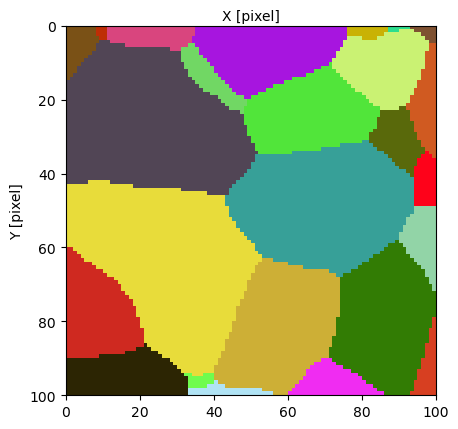

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='X [pixel]', ylabel='Y [pixel]'>)

In [6]:
micro.view_slice(display=True)

We can now close this example and see how to create datasets with the class. 

In [7]:
del micro

## Creating Microstructures

There are four ways to create a *Microstructure* dataset:

1. Creating an empty microstructure dataset 
2. Copying an existing microstructure dataset 
3. Crop a region from an existing microstructure dataset
3. Create a microstructure from data files, such as outputs of imaging techniques (reconstruction of DCT or EBSD scans for instance) or microstructure generation tools (such as Neper)

Lets start by creating a empty microstructure dataset. 

### Creating an empty microstructure dataset

In [8]:
micro = Microstructure(filename='test_microstructure', overwrite_hdf5=True, autodelete=True)

0 phases found in the data set
new phase added: unknown


The `overwrite_hdf5` instruction is used to overwrite any pre-existing dataset with the same filename, and the `autodelete` instruction ensures that the dataset will be removed when we close the class instance. The datasets created with the `Microstructure` have a predefined data model that is automatically generated (see the tutorial on [custom data models](./Curstom_Data_Models.ipynb)) : 

In [9]:
micro.print_dataset_content(short=True)

Printing dataset content with max depth 3
  |--GROUP CellData: /CellData (emptyImage) 
     --NODE Field_index: /CellData/Field_index (string_array - empty) (   63.999 Kb)
     --NODE grain_map: /CellData/grain_map (field_array - empty) (   64.000 Kb)
     --NODE mask: /CellData/mask (field_array - empty) (   64.000 Kb)
     --NODE phase_map: /CellData/phase_map (field_array - empty) (   64.000 Kb)

  |--GROUP GrainData: /GrainData (Group) 
     --NODE GrainDataTable: /GrainData/GrainDataTable (structured_array - empty) (    0.000 bytes)

  |--GROUP MeshData: /MeshData (emptyMesh) 
  |--GROUP PhaseData: /PhaseData (Group) 
    |--GROUP phase_01: /PhaseData/phase_01 (Group) 




This data model is composed of the `CellData` group to store maps of the microstructure, the `GrainData` group to store information on grains, and the `PhaseData` group to store information on the sample phases. Many methods of the `Microstructure` class interact with these data items, that are the most common and important information used to study a material sample. Naturally, all these data items are empty in this just created dataset. The next tutorials will detail how to store actual data into a microstructure object.

We will now close the dataset and see how to create a dataset from an existing one. 

In [10]:
del micro

Microstructure Autodelete: 
 Removing hdf5 file test_microstructure.h5


### Copy a microstructure dataset

As for *SampleData* datasets, *Microstructure* datasets can be copied from already existing one, using the `copy_sample` method:

Microstructure "micro"	 "File : {/stck/amarano/Codes/pymicro/examples/UserGuide/test_microstructure.h5}"
------------------------------------------------------------
* DESCRIPTION: empty

* MATERIAL PHASES: 
	Phase 1 (unknown) 
	-- Lattice (Symmetry.cubic) a=1.000, b=1.000, c=1.000 alpha=90.0, beta=90.0, gamma=90.0 

* CONTENT: 
Printing dataset content with max depth 3
  |--GROUP CellData: /CellData (3DImage) 
     --NODE grain_map: /CellData/grain_map (None) (   15.072 Kb)
     --NODE mask: /CellData/mask (None) (    4.714 Kb)
     --NODE phase_map: /CellData/phase_map (None - empty) (   64.000 Kb)

  |--GROUP CrystalStructure: /CrystalStructure (Data) 
     --NODE LatticeParameters: /CrystalStructure/LatticeParameters (None) (   64.000 Kb)

  |--GROUP GrainData: /GrainData (Data) 
     --NODE GrainDataTable: /GrainData/GrainDataTable (None) (    1.436 Kb)

  |--GROUP MeshData: /MeshData (Mesh) 
  |--GROUP PhaseData: /PhaseData (Group) 
    |--GROUP phase_01: /PhaseData/phase_01 (Gro

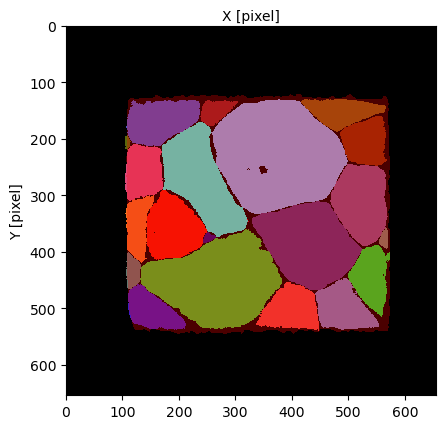

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='X [pixel]', ylabel='Y [pixel]'>)

In [11]:
original_file = os.path.join(PYMICRO_EXAMPLES_DATA_DIR,'t5_dct_slice_data.h5')
micro_copy = Microstructure.copy_sample(src_micro_file=original_file, dst_micro_file='test_microstructure',
                                       get_object=True, autodelete=True, overwrite=True)
print(micro_copy)
micro_copy.view_slice(display=True)

The new dataset file is created with the same content as the copied dataset. This process can be used to keep a reference dataset unchanged and work on its data on a separate dataset with no risk of corrupting the original data. 

Sometimes, it is relevant to work only on a small region of interest of a dataset. In that case, dealing with a large dataset can be a burden. To solve this issue, you can create a dataset of the region of interest by using the `crop` method. We will now close the copied dataset and see how to create such a cropped dataset. 

In [12]:
del micro_copy

Microstructure Autodelete: 
 Removing hdf5 file test_microstructure.h5


### Crop an existing Microstructure

The `crop` method:

* creates a new Microstructure dataset, with the same name plus the suffix `_crop`, or the name specified by the optional argument `crop_name`
* crops all fields of the `CellData` group of the original Microstructure, by extracting the subregion indicated by the `x_start, x_end, y_start, y_end, z_start, z_end` arguments (bounds indices of the cropped region). Then, it adds them to the `CellData` group of the new Microstructure.
* fills the *GrainDataTable* of the new microstructure with only the grains contained in the cropped region, and recomputes the grains geometric data for the new grain map, unless argument `recompute_geometry` is set to `False`.

Let us try to crop a small region of our first example microstructure dataset. First we need to open again the first microstructure:

In [13]:
micro = Microstructure(filename=dataset_file)

and then use its `crop` method:

CROP: test_crop
0 phases found in the data set
new phase added: Ti grade 2
cropping microstructure to test_crop_data.h5
cropping field grain_map

cropping field mask

cropping field orientation_map
cropping field grain_map_raw
cropping field uncertainty_map
cropping field Amitex_stress_1
cropping field Amitex_strain_1
origin will be set to [0.0366 0.0366 0.0366]
9 grains in cropped microstructure
updating grain geometry
Printing dataset content with max depth 3
  |--GROUP CellData: /CellData (3DImage) 
     --NODE Amitex_stress_1: /CellData/Amitex_stress_1 (field_array) (    4.980 Mb)
     --NODE Field_index: /CellData/Field_index (string_array - empty) (   63.999 Kb)
     --NODE grain_map: /CellData/grain_map (field_array) (  125.000 Kb)
     --NODE grain_map_raw: /CellData/grain_map_raw (field_array) (  125.000 Kb)
     --NODE mask: /CellData/mask (field_array) (   62.500 Kb)
     --NODE phase_map: /CellData/phase_map (field_array - empty) (   64.000 Kb)
     --NODE uncertainty_map: 

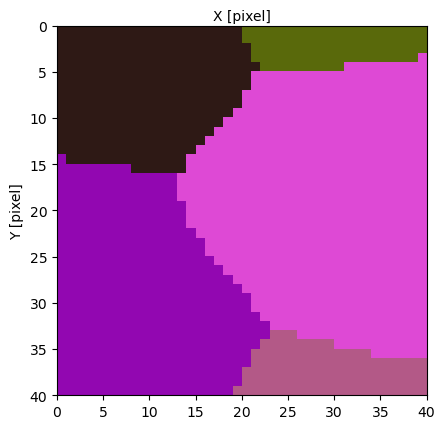

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='X [pixel]', ylabel='Y [pixel]'>)

In [14]:
micro_crop = micro.crop(x_start=30, x_end=70, y_start=30, y_end=70, z_start=30, z_end=70, crop_name='test_crop',
                       autodelete=True)
micro_crop.print_dataset_content(short=True)
micro_crop.view_slice(display=True) # set to True to try reproducing the figure below !

         
<div class="alert alert-warning">

**Warning** 
    
Cropping a microstructure can be long if the original microstructure is heavy and has a lot a fields for the `CellData` group. If you only want to crop some of these fields, you may want to create a new microstructure, add to its `CellData` group only the fields you want to crop, and then create your crop from this new instance.

</div>

We have now reviewed three methods to create a polycrystalline dataset with the `Microstructure` class. Specific tutorials are dedicated to the creation of datasets from external data files. We can now close our datasets, and move the next tutorials, that will teach you how to interact with the different type of data stored into a microstructure ! 

In [15]:
del micro
del micro_crop 

Microstructure Autodelete: 
 Removing hdf5 file test_crop_data.h5
